In [1]:
from sllearn import (KFarthestClassifier,
                     auto_modeller,
                     model_plotter,
                     compare_model_plots,
                     combined_model_weighting)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Boston Cancer Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

X = load_breast_cancer().data
y = load_breast_cancer().target

In [3]:
random_state = 0
X_use, X_test, y_use, y_test = train_test_split(X, y, 
                                                test_size=0.2,
                                                random_state=random_state)

In [4]:
X_use = (X_use - X_use.mean(axis=0)) / X_use.std(axis=0)
print(X_use.shape)

(455, 30)


In [5]:
knn_all_train, knn_all_validation, neighbors_settings = auto_modeller(X_use,
                                                                y_use,
                                                                KNeighborsClassifier)

Simulations: 100%|████████████████████████████| 100/100 [11:48<00:00,  7.08s/it]


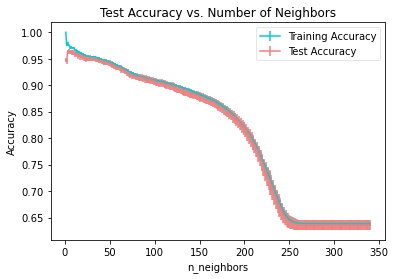

In [6]:
model_plotter("n_neighbors", neighbors_settings, knn_all_train, knn_all_validation)

In [7]:
kfn_all_train, kfn_all_validation, farthest_settings = auto_modeller(X_use,
                                                               y_use,
                                                               KFarthestClassifier)

Simulations: 100%|████████████████████████████| 100/100 [11:03<00:00,  6.63s/it]


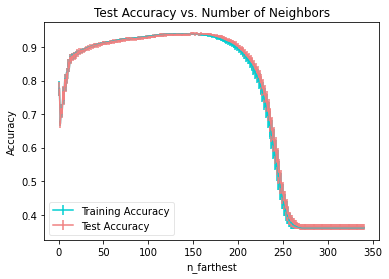

In [8]:
model_plotter("n_farthest", farthest_settings, kfn_all_train, kfn_all_validation)

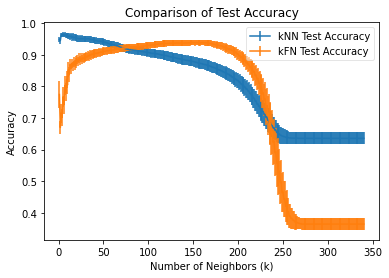

kNN Maximum test accuracy is 0.964561 for 5 neighbors
kFN Maximum test accuracy is 0.939035 for 149 neighbors


In [9]:
compare_model_plots([knn_all_validation, 'kNN', neighbors_settings],
                    [kfn_all_validation, 'kFN', farthest_settings])

In [10]:
max_neighbor = neighbors_settings[knn_all_validation.mean(axis=1).argmax()]
max_farthest = farthest_settings[kfn_all_validation.mean(axis=1).argmax()]
print(max_neighbor, max_farthest)
wa_training, wa_validation, weight_settings = combined_model_weighting(X_use,
                                                                       y_use,
                                                                       max_neighbor,
                                                                       max_farthest)

5 149


Simulations: 100%|██████████████████████████| 1000/1000 [00:37<00:00, 26.67it/s]


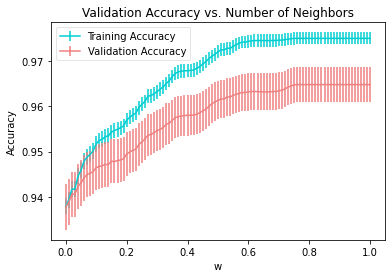

Weighted Average Ensemble Maximum Validation accuracy is 0.964807 for w = 0.76
Weighted Average Ensemble Validation accuracy is 0.937763 for w = 0.0
Weighted Average Ensemble Validation accuracy is 0.964807 for w = 1.0


In [11]:
model_plotter("w", weight_settings, wa_training, wa_validation, 'validation')

val_mean = wa_validation.mean(axis=1)
optimal_w = round(weight_settings[val_mean.argmax()], 2)
print(f'Weighted Average Ensemble Maximum Validation accuracy is {val_mean[val_mean.argmax()]:.6f}'
      f' for w = {optimal_w}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[0]:.6f}'
      f' for w = {weight_settings[0]}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[-1]:.6f}'
      f' for w = {weight_settings[-1]}')

## Wine Dataset

In [12]:
from sklearn.datasets import load_wine

X = load_wine().data
y = load_wine().target

In [13]:
random_state = 0
X_use, X_test, y_use, y_test = train_test_split(X, y, 
                                                test_size=0.2,
                                                random_state=random_state)

In [14]:
X_use = (X_use - X_use.mean(axis=0)) / X_use.std(axis=0)
print(X.shape)

(178, 13)


In [15]:
knn_all_train, knn_all_validation, neighbors_settings = auto_modeller(X_use,
                                                                y_use,
                                                                KNeighborsClassifier)

Simulations: 100%|████████████████████████████| 100/100 [01:01<00:00,  1.63it/s]


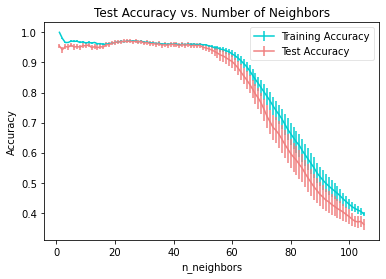

In [16]:
model_plotter("n_neighbors", neighbors_settings, knn_all_train, knn_all_validation)

In [17]:
kfn_all_train, kfn_all_validation, farthest_settings = auto_modeller(X_use,
                                                               y_use,
                                                               KFarthestClassifier)

Simulations: 100%|████████████████████████████| 100/100 [00:46<00:00,  2.14it/s]


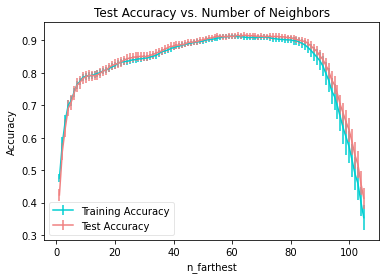

In [18]:
model_plotter("n_farthest", farthest_settings, kfn_all_train, kfn_all_validation)

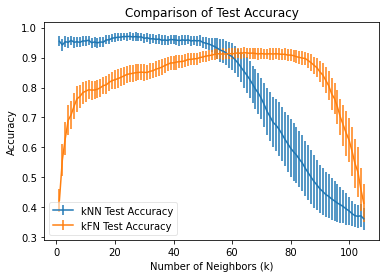

kNN Maximum test accuracy is 0.970833 for 25 neighbors
kFN Maximum test accuracy is 0.916389 for 64 neighbors


In [19]:
compare_model_plots([knn_all_validation, 'kNN', neighbors_settings],
                    [kfn_all_validation, 'kFN', farthest_settings])

In [20]:
max_neighbor = neighbors_settings[knn_all_validation.mean(axis=1).argmax()]
max_farthest = farthest_settings[kfn_all_validation.mean(axis=1).argmax()]
print(max_neighbor, max_farthest)
wa_training, wa_validation, weight_settings = combined_model_weighting(X_use,
                                                                       y_use,
                                                                       max_neighbor,
                                                                       max_farthest)

25 64


Simulations: 100%|██████████████████████████| 1000/1000 [00:17<00:00, 56.23it/s]


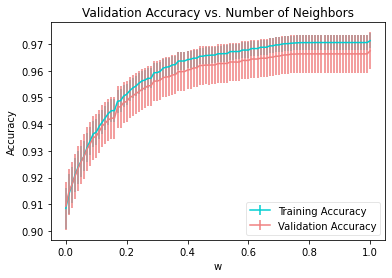

Weighted Average Ensemble Maximum Validation accuracy is 0.967417 for w = 1.0
Weighted Average Ensemble Validation accuracy is 0.909333 for w = 0.0
Weighted Average Ensemble Validation accuracy is 0.967417 for w = 1.0


In [21]:
model_plotter("w", weight_settings, wa_training, wa_validation, 'validation')

val_mean = wa_validation.mean(axis=1)
optimal_w = round(weight_settings[val_mean.argmax()], 2)
print(f'Weighted Average Ensemble Maximum Validation accuracy is {val_mean[val_mean.argmax()]:.6f}'
      f' for w = {optimal_w}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[0]:.6f}'
      f' for w = {weight_settings[0]}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[-1]:.6f}'
      f' for w = {weight_settings[-1]}')

## Iris Dataset

In [22]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

In [23]:
random_state = 0
X_use, X_test, y_use, y_test = train_test_split(X, y, 
                                                test_size=0.2,
                                                random_state=random_state)

In [24]:
X_use = (X_use - X_use.mean(axis=0)) / X_use.std(axis=0)
print(X.shape)

(150, 4)


In [25]:
knn_all_train, knn_all_validation, neighbors_settings = auto_modeller(X_use,
                                                                y_use,
                                                                KNeighborsClassifier)

Simulations: 100%|████████████████████████████| 100/100 [00:43<00:00,  2.30it/s]


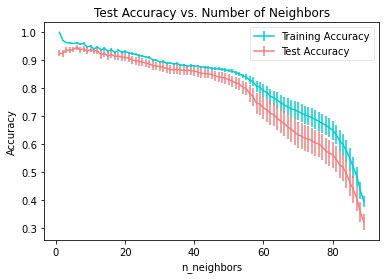

In [26]:
model_plotter("n_neighbors", neighbors_settings, knn_all_train, knn_all_validation)

In [27]:
kfn_all_train, kfn_all_validation, farthest_settings = auto_modeller(X_use,
                                                               y_use,
                                                               KFarthestClassifier)

Simulations: 100%|████████████████████████████| 100/100 [00:32<00:00,  3.05it/s]


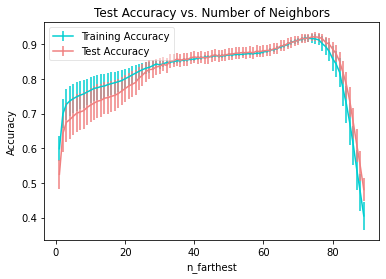

In [28]:
model_plotter("n_farthest", farthest_settings, kfn_all_train, kfn_all_validation)

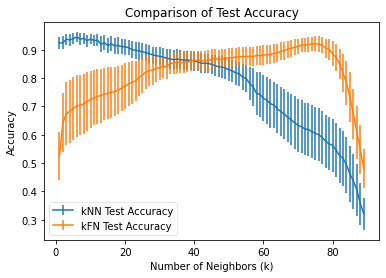

kNN Maximum test accuracy is 0.945667 for 6 neighbors
kFN Maximum test accuracy is 0.921667 for 75 neighbors


In [29]:
compare_model_plots([knn_all_validation, 'kNN', neighbors_settings],
                    [kfn_all_validation, 'kFN', farthest_settings])

In [30]:
max_neighbor = neighbors_settings[knn_all_validation.mean(axis=1).argmax()]
max_farthest = farthest_settings[kfn_all_validation.mean(axis=1).argmax()]
print(max_neighbor, max_farthest)
wa_training, wa_validation, weight_settings = combined_model_weighting(X_use,
                                                                       y_use,
                                                                       max_neighbor,
                                                                       max_farthest)

6 75


Simulations: 100%|██████████████████████████| 1000/1000 [00:16<00:00, 59.40it/s]


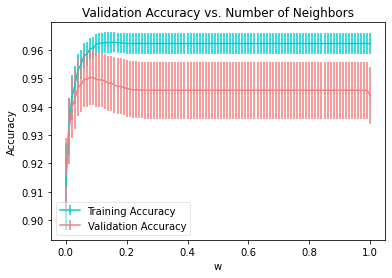

Weighted Average Ensemble Maximum Validation accuracy is 0.950367 for w = 0.08
Weighted Average Ensemble Validation accuracy is 0.915833 for w = 0.0
Weighted Average Ensemble Validation accuracy is 0.943967 for w = 1.0


In [31]:
model_plotter("w", weight_settings, wa_training, wa_validation, 'validation')

val_mean = wa_validation.mean(axis=1)
optimal_w = round(weight_settings[val_mean.argmax()], 2)
print(f'Weighted Average Ensemble Maximum Validation accuracy is {val_mean[val_mean.argmax()]:.6f}'
      f' for w = {optimal_w}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[0]:.6f}'
      f' for w = {weight_settings[0]}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[-1]:.6f}'
      f' for w = {weight_settings[-1]}')

## Penguins Dataset

In [32]:
import seaborn as sns

penguins_dataset = sns.load_dataset('penguins')

use_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = penguins_dataset[use_cols]
df = (df - df.mean(axis=0)) / df.std(axis=0)
df['target'] = penguins_dataset['species']
df.dropna(inplace=True)

X = df.iloc[:,:-1]
y = df['target']

In [33]:
random_state = 0
X_use, X_test, y_use, y_test = train_test_split(X, y, 
                                                test_size=0.2,
                                                random_state=random_state)

In [34]:
X_use = (X_use - X_use.mean(axis=0)) / X_use.std(axis=0)
print(X.shape)

(342, 4)


In [35]:
knn_all_train, knn_all_validation, neighbors_settings = auto_modeller(X_use,
                                                                y_use,
                                                                KNeighborsClassifier)

Simulations: 100%|████████████████████████████| 100/100 [03:40<00:00,  2.20s/it]


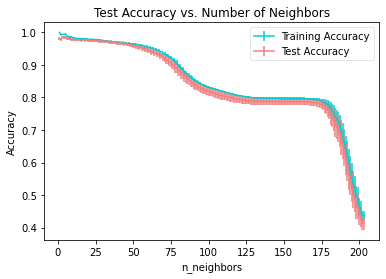

In [36]:
model_plotter("n_neighbors", neighbors_settings, knn_all_train, knn_all_validation)

In [37]:
kfn_all_train, kfn_all_validation, farthest_settings = auto_modeller(X_use,
                                                               y_use,
                                                               KFarthestClassifier)

Simulations: 100%|████████████████████████████| 100/100 [03:04<00:00,  1.85s/it]


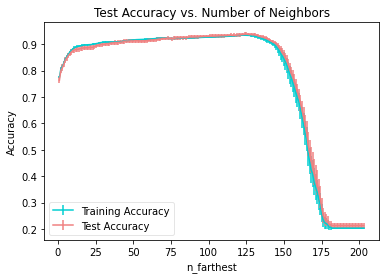

In [38]:
model_plotter("n_farthest", farthest_settings, kfn_all_train, kfn_all_validation)

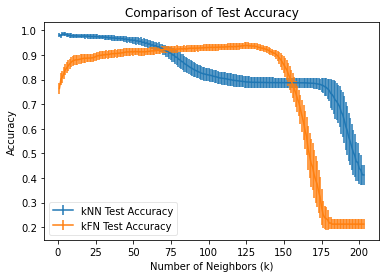

kNN Maximum test accuracy is 0.985652 for 3 neighbors
kFN Maximum test accuracy is 0.938551 for 124 neighbors


In [39]:
compare_model_plots([knn_all_validation, 'kNN', neighbors_settings],
                    [kfn_all_validation, 'kFN', farthest_settings])

In [40]:
max_neighbor = neighbors_settings[knn_all_validation.mean(axis=1).argmax()]
max_farthest = farthest_settings[kfn_all_validation.mean(axis=1).argmax()]
print(max_neighbor, max_farthest)
wa_training, wa_validation, weight_settings = combined_model_weighting(X_use,
                                                                       y_use,
                                                                       max_neighbor,
                                                                       max_farthest)

3 124


Simulations: 100%|██████████████████████████| 1000/1000 [00:31<00:00, 31.58it/s]


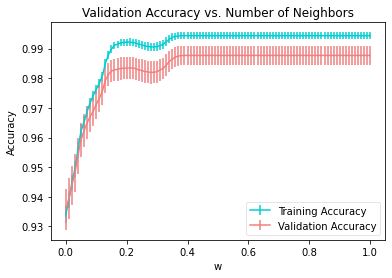

Weighted Average Ensemble Maximum Validation accuracy is 0.987710 for w = 0.39
Weighted Average Ensemble Validation accuracy is 0.935652 for w = 0.0
Weighted Average Ensemble Validation accuracy is 0.987710 for w = 1.0


In [41]:
model_plotter("w", weight_settings, wa_training, wa_validation, 'validation')

val_mean = wa_validation.mean(axis=1)
optimal_w = round(weight_settings[val_mean.argmax()], 2)
print(f'Weighted Average Ensemble Maximum Validation accuracy is {val_mean[val_mean.argmax()]:.6f}'
      f' for w = {optimal_w}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[0]:.6f}'
      f' for w = {weight_settings[0]}')
print(f'Weighted Average Ensemble Validation accuracy is {val_mean.values[-1]:.6f}'
      f' for w = {weight_settings[-1]}')